### Audiotechnik I - Elektroakustik
# Hausaufgabe 3

### Hinweise zur Abgabe

Die Abgabe erfolgt über die Upload-Option im ISIS-Kurs. Den Abgabetermin finden Sie auf der Kursseite. Verspätete Abgaben bzw. Abgaben, die nicht über das ISIS-Portal erfolgen, werden für die Bewertung nicht berücksichtigt. Pro Gruppe wird nur eine Abgabe hochgeladen.

## WICHTIG:
Die Auswertung der Programmieraufgaben erfolgt halbautomatisiert.

* Weisen Sie die Werte Ihrer Lösungen den in den Aufgabenstellungen genannten Variablennamen zu, falls angegeben.
* Fügen Sie Lösung von Python-Aufgaben **nur** in den gekennzeichneten Bereichen ein:
```python
# Fügen Sie hier Ihre Lösung ein:

# Ab hier nicht mehr bearbeiten.
```
* Fügen Sie Erläuterungen und Diskussionen **nur** in den gekennzeichneten Bereichen ein:

    *Fügen Sie hier Ihre Lösung ein:*

    *Ab hier nicht mehr bearbeiten.*


* Ignorieren Sie alle leeren, schreibgeschützten Zellen.
* Zellen mit `assert`-Tests  dienen der Selbstkontrolle sowie der automatisierten Bewertung. Wenn diese Zellen beim Ausführen einen Fehler auslösen, wurde die Aufgabe nicht richtig gelöst. Bitte verändern Sie **nicht** den Inhalt der Testzellen. Manche Tests sind versteckt: Auch wenn die sichtbaren Tests keine Fehler anzeigen, ist die Aufgabe nicht zwingend richtig gelöst.
* <span style="background-color:red; color:white">**Löschen oder ergänzen sie keine Zellen.**</span>
* <span style="background-color:red; color:white">**Benennen Sie die Dateien nicht um und ändern Sie nichts an der Ordnerstruktur. Komprimieren Sie die fertige Abgabe inklusive aller zum Ausführen des Notebooks benötigten Dateien in ein .zip-Archiv und Laden Sie diese Datei hoch.**</span>


Zur Lösung der Hausaufgabe dürfen die folgenden Module verwendet werden.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sounddevice as sd
import pyfar as pf

# Einstellungen für Matplotlib, können auch deaktiviert werden:
matplotlib.rcParams['figure.figsize'] = (6, 3) # default figure size
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Tipp: Nearest Neighbour Search könnte hilfreich sein:
def find_nearest_index(array, value):
    "Find index of nearest value. If value is a list, return a list of indices."
    array = np.asarray(array)

    if np.isscalar(value):
        return np.abs(array - value).argmin()
    else:
        return [find_nearest_index(array, v) for v in value]

Anleitung zur Installation der Module und dem Umgang mit `pyfar` und `sounddevice` finden Sie auf ISIS im Material zur 1. Übung im Jupyter Notebook `python_pyfar_introduction.ipynb`.

# Aufgabe 1: Kopfhörerentzerrung

Wenn Kopfhörer für die Wiedergabe von 3D-Audioinhalten verwendet werden, werden **H**ead-**R**elated **T**ransfer **F**unctions (HRTFs) auf Audiosignale angewendet, um den Höreindruck einer Schallquelle mit beliebiger Einfallrichtung zu erzeugen.

Der Einfluss des Kopfhörers, einschließlich des Frequenzgangs des Kopfhörers und des Übertragungswegs von der Membran zum Gehörgang, wird durch die **H**ead**p**hone **T**ransfer **F**unction (HpTF) bzw. **H**ead**p**hone **I**mpulse **R**esponse (HpIR) beschrieben.

Damit der Einfluss der HRTF nicht durch die HpTF gestört wird ist es erforderlich, die HpTF zu kompensieren und so einen konstanten Frequenzgang vom Kopfhörertreiber zum Ohr sicherzustellen. Dieses Kompensationsfilter wird als Kopfhörer-Entzerrungsfilter oder **H**ead**p**hone **C**orrection **F**ilter (HpCF) bezeichnet.

In dieser Aufgabe werden Sie zwei einfache Ansätze zur Kopfhörerentzerrung ausprobieren und die Ergebnisse analysieren.

<div class="admonition important alert alert-block alert-success">

🚀 Bisher haben Sie ihre Signalverarbeitungskenntnisse vertieft, indem Sie alle Funktionen mit numpy oder scipy selber programmiert haben. 
In dieser Aufgabe arbeiten Sie nun mit dem Paket Pyfar, das Ihnen viele DSP-Funktionen, einen audiospezifischen Datentyp mit simultaner Speicherung von Zeit- und Frequenzdaten, sowie praktische Plot-Funktionen bietet.

Die benötigten Pyfar-Funktionen bzw. Module sind in den Aufgaben genannt. Die benötigten Parameter werden nicht nochmal separat erklärt, schlagen Sie in der [pyfar API Reference](https://pyfar.readthedocs.io/en/stable/api_reference.html) nach. Dort sind alle Funktionen und deren Parameter ausführlich erklärt.

Noch mehr Infos und Tutorials finden Sie auf [pyfar.org](https://pyfar.org) und in den Materialien zur ersten Übung.
</div>

### Aufgabe 1a) (1 Punkt)

Die Datei *Sennheiser_HD-650_on_FABIAN.sofa* enthält ein Set von Kopfhörer-Impulsantworten (HpIRs) aus der [FABIAN head-related transfer function data base](https://depositonce.tu-berlin.de/bitstreams/34c0f074-dd89-4c35-93d5-fe21ad53d799/download). 

Laden Sie die SOFA-Datei mit der Funktion `pf.io.read_sofa(..., verify=False)`. Speichern Sie die HpIRs in die Variable `hpir` und verwerfen Sie die in der SOFA-Datei gespeicherten Koordinaten-Datensätze. 

**Hinweise:** 
- Der Parameter `verify=False` ist nötig, weil die in der Datei gespeicherten Metadaten nicht der aktuellen Konvention für SOFA-Dateien entsprechen. Auf die Daten, die wir benutzen werden, hat dies keinen Einfluss.
- Benutzen Sie bitte **keinen** absoluten Pfad zum Einlesen der Datei. Da die Datei im selben Verzeichnis wie dieses Notebook liegt reicht es aus, den Dateinamen ohne Pfad anzugeben.

Geben Sie die Anzahl der Kanäle und die Anzahl der Samples aus. 

In [2]:
# Fügen Sie hier Ihre Lösung ein:
hpir, source_coordinates, receiver_coordinates = pf.io.read_sofa("Sennheiser_HD-650_on_FABIAN.sofa", verify=False)
# Ab hier nicht mehr bearbeiten.

SOFA file contained custom entries
----------------------------------
GLOBAL_ProcessingState


/opt/anaconda3/envs/eds/lib/python3.10/site-packages/sofar/sofa.py:119: UserWarning: Detected preliminary conventions version 0.2. Upgrade data to version >= 1.0 if possible. Preliminary conventions might change in the future, which could invalidate data that was written before the changes.
  warnings.warn(UserWarning((


In [3]:
### BEGIN TESTS
assert isinstance(hpir, pf.Signal)
assert np.isclose(np.mean(hpir.time), 6.24e-6, atol=1e-8), f'Expected {6.24e-6}, got {np.mean(hpir.time)}'
assert np.isclose(np.std(hpir.time), 27e-3, atol=1e-3), f'Expected {27e-3}, got {np.std(hpir.time)}'
### END TESTS

### Aufgabe 1b) (1 Punkt)

Die Daten sind in $[12 \times 2]$ Kanälen sortiert, wobei 12 unabhängige Messungen jeweils für das linke und rechte Ohr vorliegen.

Speichern Sie die Daten für das rechte Ohr im `pf.Signal` Objekt `hpir_r`.

**Hinweis:** Im Datensatz hat der Kanal für das linke Ohr den Index 0, das rechte Ohr den Index 1.

In [4]:
# Fügen Sie hier Ihre Lösung ein:
hpir_r = hpir[:,1]
# Ab hier nicht mehr bearbeiten.

In [5]:
### BEGIN TESTS
assert isinstance(hpir_r, pf.Signal), f'Expected pf.Signal, got {type(hpir_r)}'
assert hpir_r.cshape == (12,), f'Expected (12,), got {hpir_r.cshape}'
assert np.isclose(np.mean(hpir_r.time), 6.9e-6, atol=1e-7), f'Expected {6.9e-6}, got {np.mean(hpir_r.time)}'
assert np.isclose(np.std(hpir_r.time), 2.7e-2, atol=1e-3), f'Expected {2.7e-2}, got {np.std(hpir_r.time)}'
### END TESTS

### Aufgabe 1c) (2 Punkte)

Mitteln Sie die Impulsantworten `hpir_r` im Zeitbereich mithilfe des `pf.dsp` Moduls (s. [Dokumentation](https://pyfar.readthedocs.io/en/stable/modules/pyfar.dsp.html)) und speichern Sie das Ergebnis in der Variable `hpir_avg`.

In [6]:
# Fügen Sie hier Ihre Lösung ein:
hpir_avg = pf.dsp.average(hpir_r)
# Ab hier nicht mehr bearbeiten.

In [7]:
### BEGIN TESTS
assert isinstance(hpir_avg, pf.Signal), f'Expected pf.Signal, got {type(hpir_avg)}'
assert hpir_avg.cshape == (1,), f'Expected (1,), got {hpir_avg.cshape}'

assert np.isclose(np.mean(hpir_avg.time), 6.8e-6, atol=1e-7), f'Expected {6.8e-6}, got {np.mean(hpir_avg.time)}'
assert np.isclose(np.std(hpir_avg.time), 2.6e-2, atol=1e-3), f'Expected {2.6e-2}, got {np.std(hpir_avg.time)}'
### END TESTS

Plotten Sie die Zeit-Frequenz-Darstellung (`pf.plot.time_freq()`) der ungemittelten und gemittelten HpIRs des rechten Ohrs in einem gemeinsamen Plot. Benutzen Sie die Pegeldarstellung im Zeit- sowie im Frequenzbereich mithilfe der entsprechenden Parameter in der Plot-Funktion. Stellen Sie die ungemittelten HpIRs alle in grau (`c=[.6, .6, .6]`) im Hintergrund dar und die gemittelte HpIR im Vordergrund, so wie in VL 9, Folie 23.

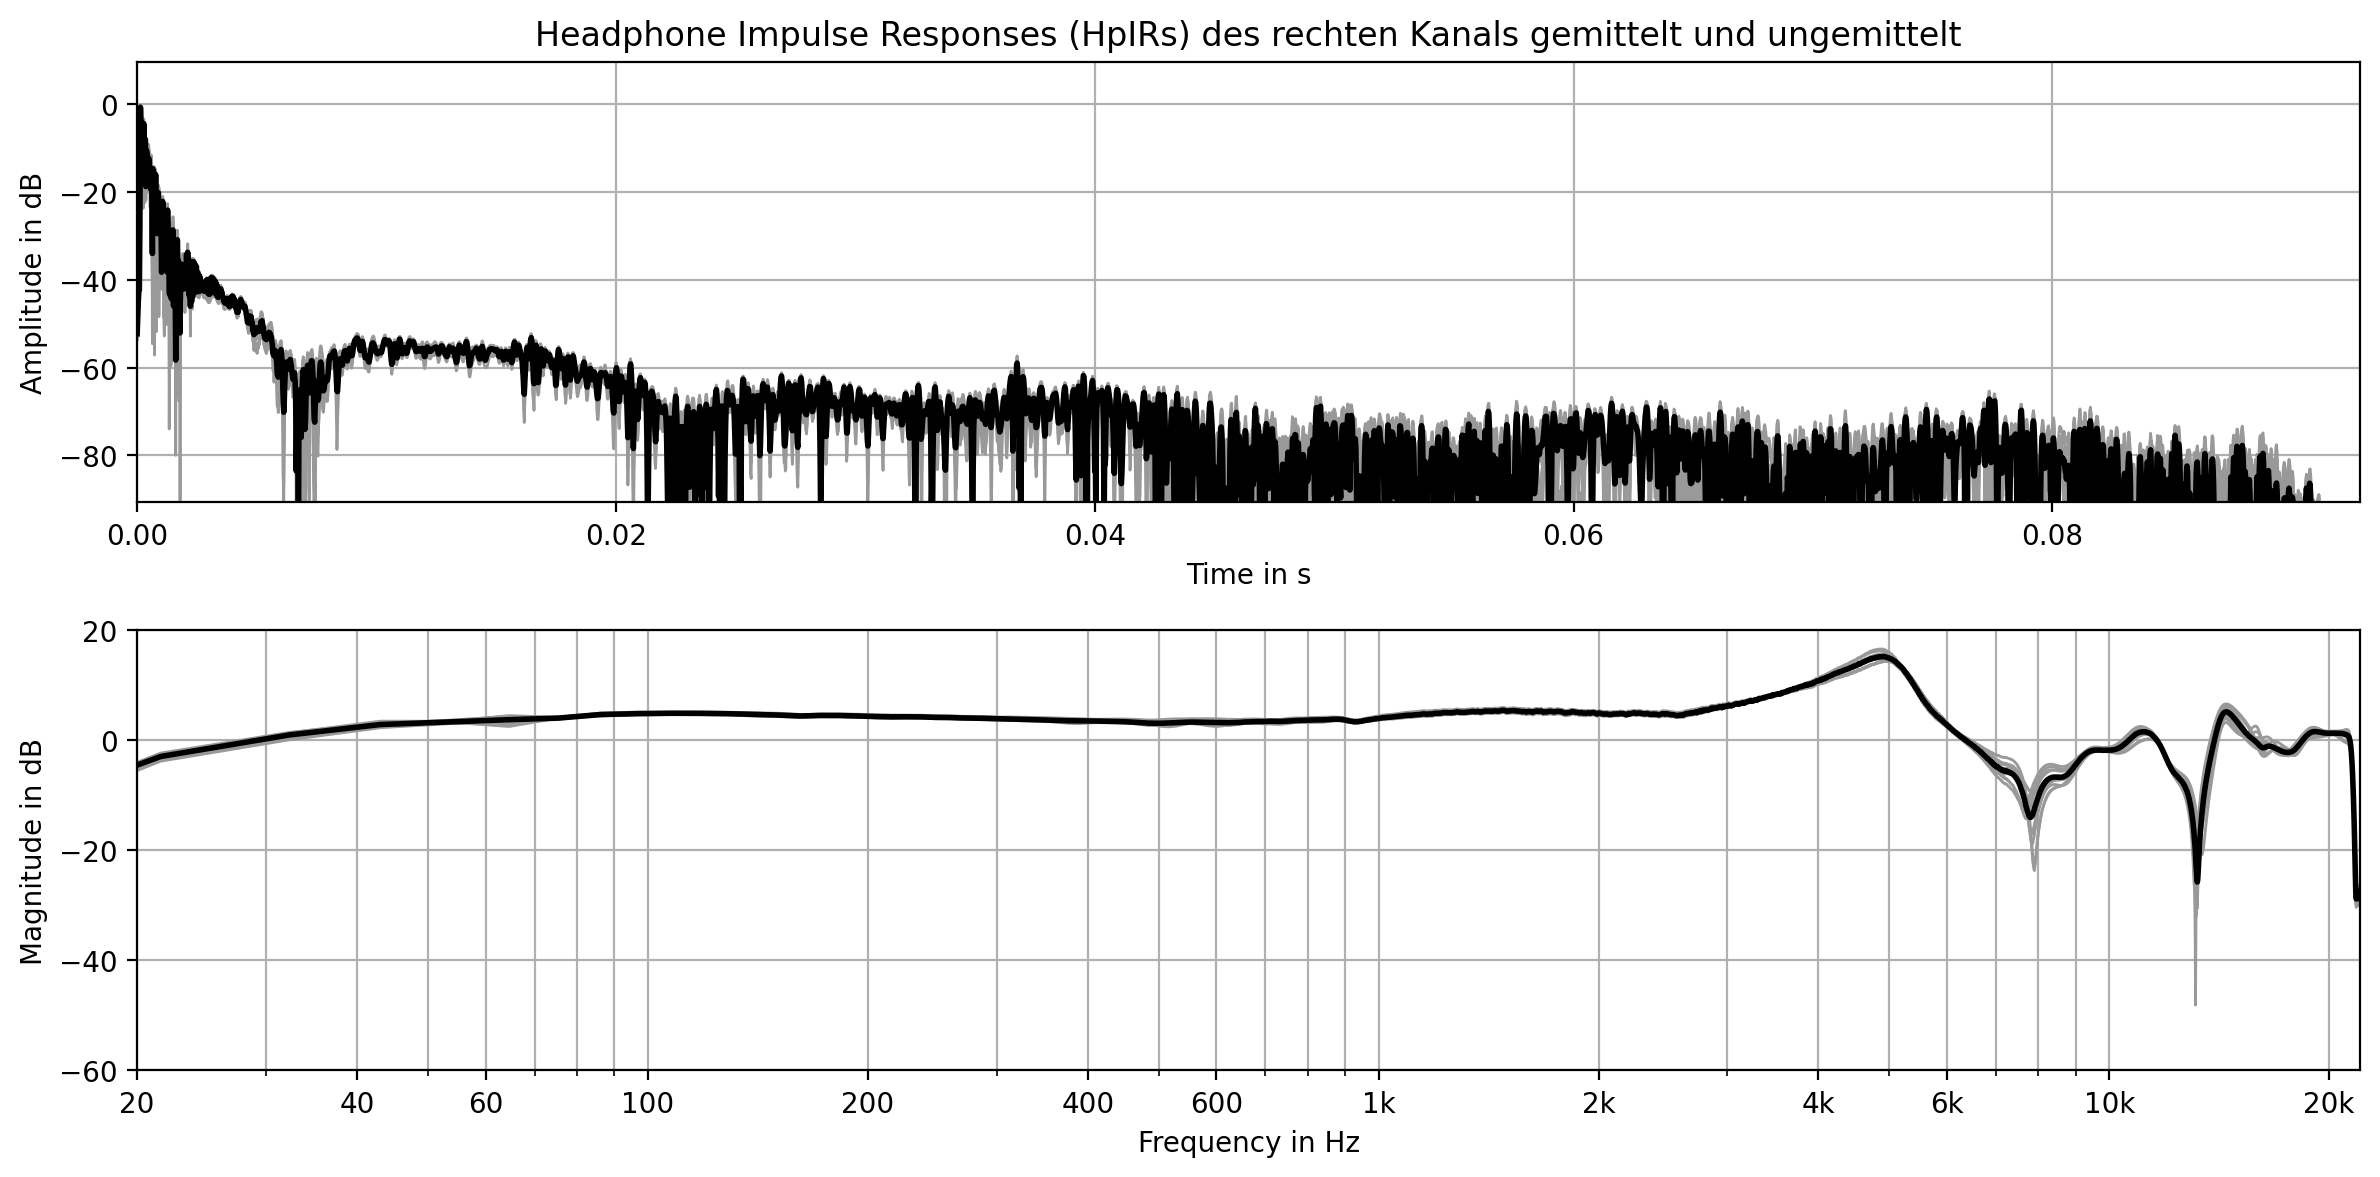

In [8]:
# Fügen Sie hier Ihre Lösung ein:
fig, ax = plt.subplots(2,1, figsize = (12,6))
pf.plot.time_freq(hpir_r, dB_time = True, dB_freq = True, c=[.6,.6,.6], lw=1, ax=ax)
pf.plot.time_freq(hpir_avg, dB_time = True, dB_freq = True, c="black", lw = 2, ax=ax)
ax[0].grid()
ax[0].set_title("Headphone Impulse Responses (HpIRs) des rechten Kanals gemittelt und ungemittelt")
ax[1].set_ylim(-60,20)
plt.tight_layout()
# Ab hier nicht mehr bearbeiten.
plt.show()

### Aufgabe 1d) (3 Punkte)

Entwerfen Sie ein Kopfhörer-Entzerrungsfilter (HpCF) durch direkte Inversion - mit folgenden drei Schritten:

1. Invertieren Sie die gemittelte HpIR `hpir_avg` im Frequenzbereich und speichern Sie das Ergebnis in der Variable `hpcf_direct`.
2. Wandeln Sie das Ergebnis mit `pf.dsp.linear_phase()` in ein linearphasiges Filter um. Setzen Sie die Gruppenlaufzeit so, dass der Peak des Zeitsignals in der Mitte zentriert ist.
3. Wenden Sie mit `pf.dsp.time_window()` ein symmetrisches Hann-Fenster auf das Ergebnis an. Die Fensterlänge soll exakt der Anzahl Samples der inversen HpIR entsprechen.

*Hinweis:* 
Arithmetische Operatoren (z.B. `+`, `-`, `*`, `/`) funktionieren auch mit `pf.Signal`-Objekten. Beispielsweise ruft der Operator `/` die Funktion `pf.divide()` auf, wenn er auf `pf.Signal` Objekte angewendet wird. [In den pyfar Tutorials](https://pyfar-gallery.readthedocs.io/en/latest/gallery/interactive/pyfar_arithmetics.html) ist beschrieben, wie sich Operationen im Zeit- und Frequenzbereich unterscheiden, und ob die arithmetischen Operatoren standardmäßig im Zeit- oder Frequenzbereich arbeiten.

In [9]:
# Fügen Sie hier Ihre Lösung ein:

hpcf_direct = 1/hpir_avg    # Invertieren
hpcf_direct = pf.dsp.linear_phase(hpcf_direct, hpcf_direct.n_samples//2) # Linearphasig mit Peak in Mitte des Zeitsignals
hpcf_direct = pf.dsp.time_window(hpcf_direct, interval = (0,hpcf_direct.n_samples-1), window="hann")

# Ab hier nicht mehr bearbeiten.

In [10]:
### BEGIN TESTS
assert isinstance(hpcf_direct, pf.Signal), f'Expected pf.Signal, got {type(hpcf_direct)}'
assert hpcf_direct.cshape == (1,), f'Expected (1,), got {hpcf_direct.cshape}'
assert hpcf_direct.n_samples == hpir_avg.n_samples, f'Expected {hpir_avg.n_samples}, got {hpcf_direct.n_samples}'

assert np.isclose(np.mean(hpcf_direct.time), 5.3e-3, atol=2e-4), f'Expected {5.3e-3}, got {np.mean(hpcf_direct.time)}'
assert np.isclose(np.std(hpcf_direct.time),  5.9e-2, atol=2e-3), f'Expected {5.9e-2}, got {np.std(hpcf_direct.time)}'
### END TESTS

### Aufgabe 1e) (3 Punkte)

Entwerfen Sie ein Kopfhörer-Entzerrungsfilter (HpCF) durch regularisierte Inversion - mit folgenden drei Schritten:

- Führen Sie eine regularisierte Inversion der gemittelten HpTF mit `pf.dsp.regularized_spectrum_inversion()` durch und speichern Sie das Ergebnis als `hpcf_regu`. Nutzen Sie für Frequenzen unter 50 Hz und über 6 kHz einen Regularisierungsfaktor von `2.5e-3`, und innerhalb der Grenzfrequenzen den Standardwert.
- Wandeln Sie das Ergebnis in ein linearphasiges Filter um (analog zu Aufgabe 1d)).
- Wenden Sie ein symmetrisches Hann-Fenster auf das Ergebnis an (analog zu Aufgabe 1d)).

In [11]:
# Fügen Sie hier Ihre Lösung ein:
hpcf_regu = pf.dsp.regularized_spectrum_inversion(hpir_avg, frequency_range=(50,6000), regu_outside=2.5e-3)
hpcf_regu = pf.dsp.linear_phase(hpcf_regu, hpcf_regu.n_samples/2) # Linearphasig mit Peak in Mitte des Zeitsignals
hpcf_regu = pf.dsp.time_window(hpcf_regu, interval = (0,hpcf_regu.n_samples-1), window="hann")

# Ab hier nicht mehr bearbeiten.

In [12]:
### BEGIN TESTS
assert isinstance(hpcf_regu, pf.Signal), f'Expected pf.Signal, got {type(hpcf_regu)}'
assert hpcf_regu.cshape == (1,), f'Expected (1,), got {hpcf_regu.cshape}'
assert hpcf_regu.n_samples == hpir_avg.n_samples, f'Expected {hpir_avg.n_samples}, got {hpcf_regu.n_samples}'

assert np.isclose(np.mean(hpcf_regu.time), 2.0e-4, atol=2e-5), f'Expected {2.0e-4}, got {np.mean(hpcf_regu.time)}'
assert np.isclose(np.std(hpcf_regu.time),  1.6e-2, atol=2e-3), f'Expected {1.6e-2}, got {np.std(hpcf_regu.time)}'
### END TESTS

### Aufgabe 1f) (2 Punkte)

Vergleichen Sie die beiden inversen Filter wie folgt:
Plotten Sie die Zeit-Frequenz-Darstellung (`pyfar.plot.time_freq()`) der beiden inversen Filter in einem gemeinsamen Plot. Benutzen Sie die Pegeldarstellung im Zeit- sowie im Frequenzbereich mithilfe der entsprechenden Parameter in der Plot-Funktion. Fügen Sie eine Legende ein.

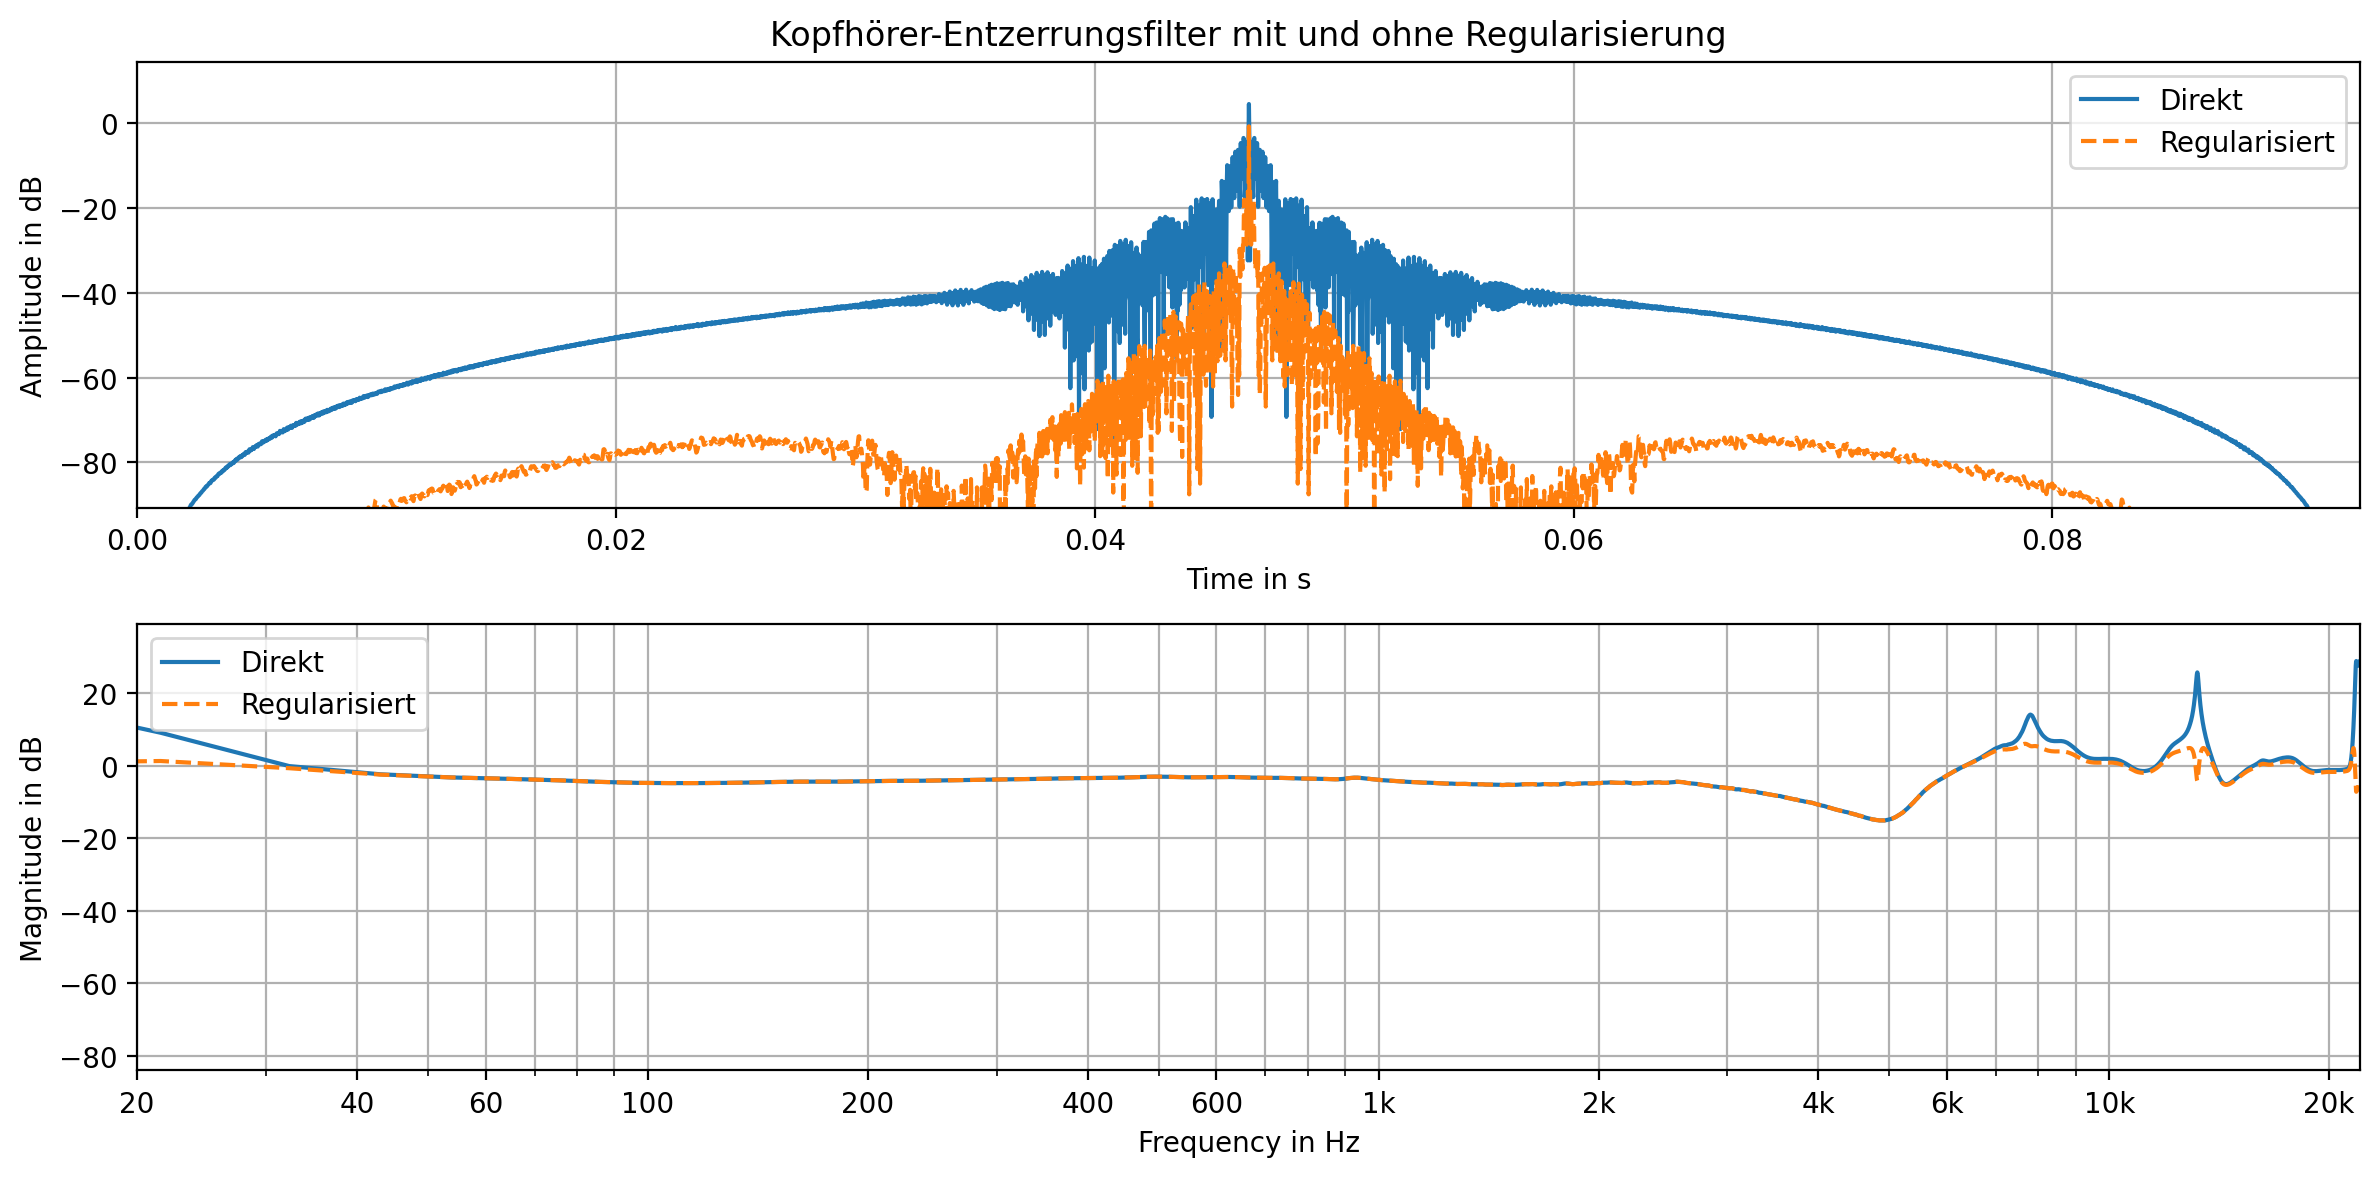

In [13]:
# Fügen Sie hier Ihre Lösung ein:
fig, ax = plt.subplots(2,1, figsize = (12,6))
pf.plot.time_freq(hpcf_direct, dB_time = True, dB_freq = True, ax=ax, label = "Direkt")
pf.plot.time_freq(hpcf_regu, dB_time = True, dB_freq = True, linestyle = "--", ax=ax, label = "Regularisiert")
ax[0].grid()
ax[0].set_title("Kopfhörer-Entzerrungsfilter mit und ohne Regularisierung")
ax[0].legend()
ax[1].legend()
plt.tight_layout()
# Ab hier nicht mehr bearbeiten.
plt.show()

Beschreiben Sie die Unterschiede der Impulsantworten und Spektren.

*Fügen Sie hier Ihre Lösung ein:*

Die Impulsantwort der regularisierten Inversion hat geringere Peaks als die der direkten Inversion und flacht außerdem zur Seite schneller ab, klingt also schneller ab aufgrund der geringeren Verstärkung. Außerdem ist in der regularisierten Impulsantwort ein Dip bei ca 0.035s und 0.06s symmetrisch um die Mitte zu erkennen, der auf die Grenzfrequenzen der Regularisierung zurück zu führen ist.


Im Frequenzbereich zwischen 50 Hz und 6000 Hz sind direktes und regularisiertes Entzerrungsfilter identisch, unter- und oberhalb der Grenzfrequenzen weichen die beiden Kurven durch den Regularisierungsfaktor voneinander ab. Die Regularisierung führt dazu, dass starke Anhebungen, die in der direkten Inversion vorhanden sind, weniger stark ausfallen. Diese starken Anhebungen kommen beispielsweise von Inteferenzen, die sich bei minimal anderem Aufsetzen des Kopfhörers ändern oder dadurch, dass der Kopfhörer bei dieser Frequenz nichts mehr abstrahlen kann. Die regularisierte Inversion führt also zu einem in der Praxis besseren Entzerrungsergebnis mit weniger Artefakten.


*Ab hier nicht mehr bearbeiten.*

### Aufgabe 1g) (3 Punkte)

Vergleichen Sie die Ergebnisse durch Faltung der inversen Filter mit den HpIRs. Gehen Sie wie folgt vor:

1. Falten Sie die ungemittelten HpIRs des rechten Ohrs (`hpir_r`) mit den Entzerrungsfiltern `hpcf_direct` und `hpcf_regu`. Benutzen Sie die Funktion `pf.dsp.convolve()`.
2. Speichern Sie die Ergebnisse in den Variablen `hpir_compensated_direct` und `hpir_compensated_regu`. 

In [14]:
# Fügen Sie hier Ihre Lösung ein:

hpir_compensated_direct = pf.dsp.convolve(hpir_r, hpcf_direct)
hpir_compensated_regu = pf.dsp.convolve(hpir_r, hpcf_regu)

# Ab hier nicht mehr bearbeiten.

In [15]:
### BEGIN TESTS
assert isinstance(hpir_compensated_direct, pf.Signal), f'Expected pf.Signal, got {type(hpir_compensated_direct)}'
assert isinstance(hpir_compensated_regu, pf.Signal), f'Expected pf.Signal, got {type(hpir_compensated_regu)}'
assert hpir_compensated_direct.cshape == (12,), f'Expected (12,), got {hpir_compensated_direct.cshape}'
assert hpir_compensated_regu.cshape == (12,), f'Expected (12,), got {hpir_compensated_regu.cshape}'

assert np.isclose(np.mean(hpir_compensated_direct.time), 7.4e-5, atol=2e-6), f'Expected {7.4e-5}, got {np.mean(hpir_compensated_direct.time)}'
assert np.isclose(np.std( hpir_compensated_direct.time), 1.1e-2, atol=2e-3), f'Expected {1.1e-2}, got {np.std(hpir_compensated_direct.time)}'
assert np.isclose(np.mean(hpir_compensated_regu.time)  , 2.9e-6, atol=2e-7), f'Expected {2.9e-6}, got {np.mean(hpir_compensated_regu.time)}'
assert np.isclose(np.std( hpir_compensated_regu.time)  , 1.0e-2, atol=2e-3), f'Expected {1.0e-2}, got {np.std(hpir_compensated_regu.time)}'
### END TESTS

Stellen Sie die Impulsantworten und Spektren der kompensierten HpIRs `hpir_compensated_direct` und `hpir_compensated_regu` grafisch dar (2 Figures mit jeweils einem `pyfar.plot.time_freq()` Plot). Benutzen Sie die Pegeldarstellung im Zeit- sowie im Frequenzbereich mithilfe der entsprechenden Parameter in der Plot-Funktion. Benutzen Sie in beiden Grafiken die gleichen Achsenlimits.

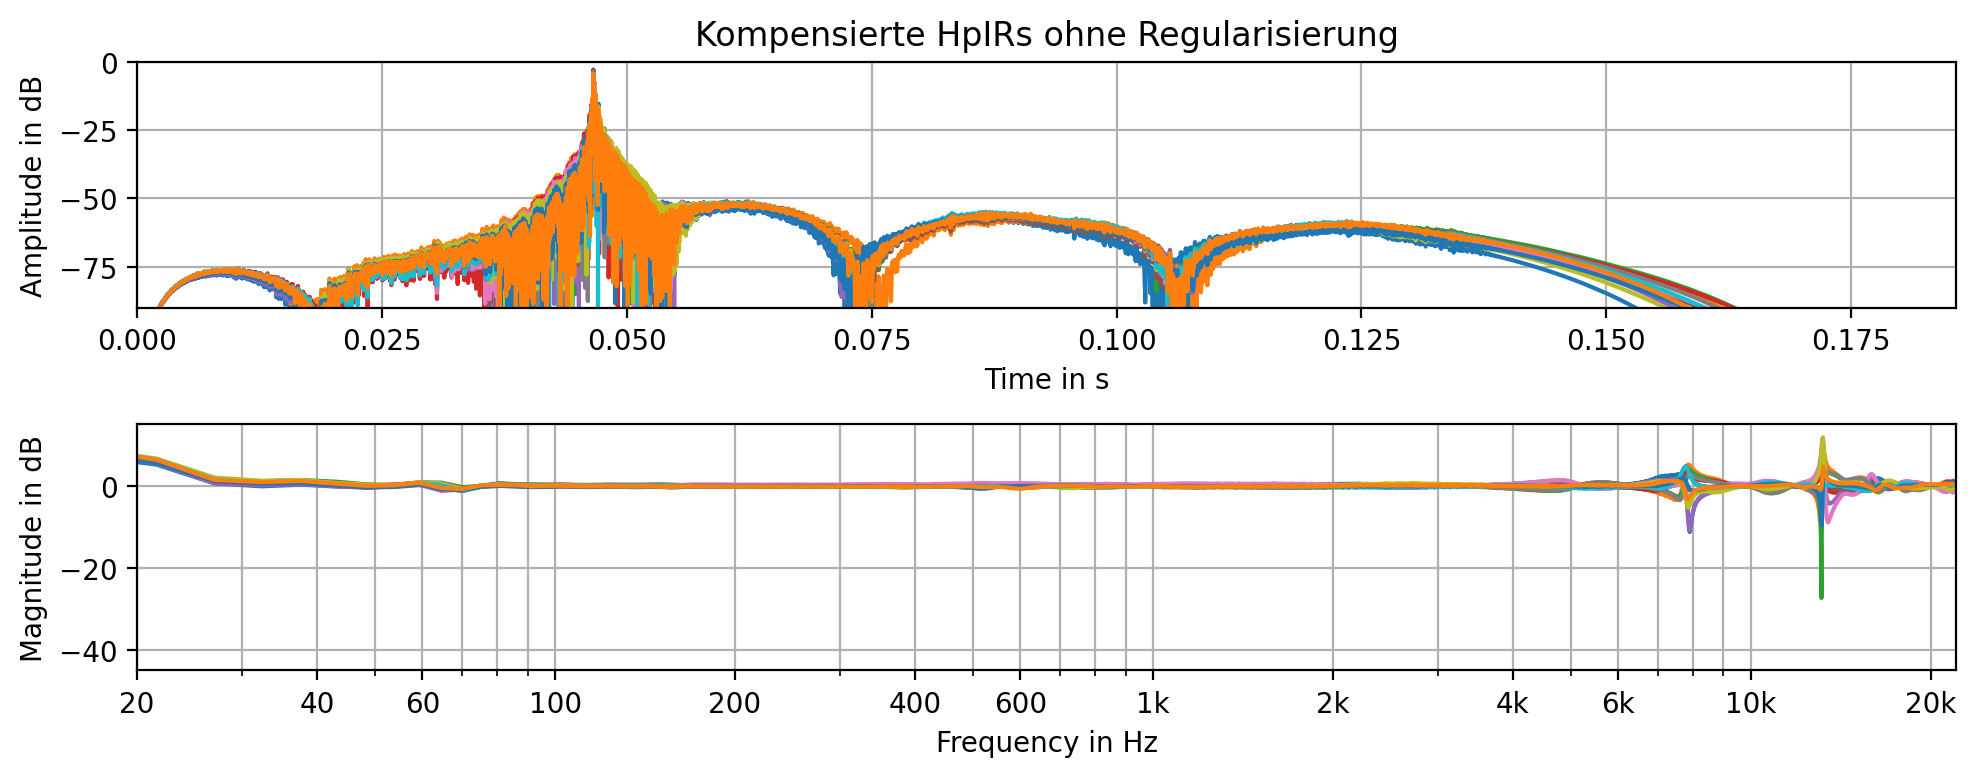

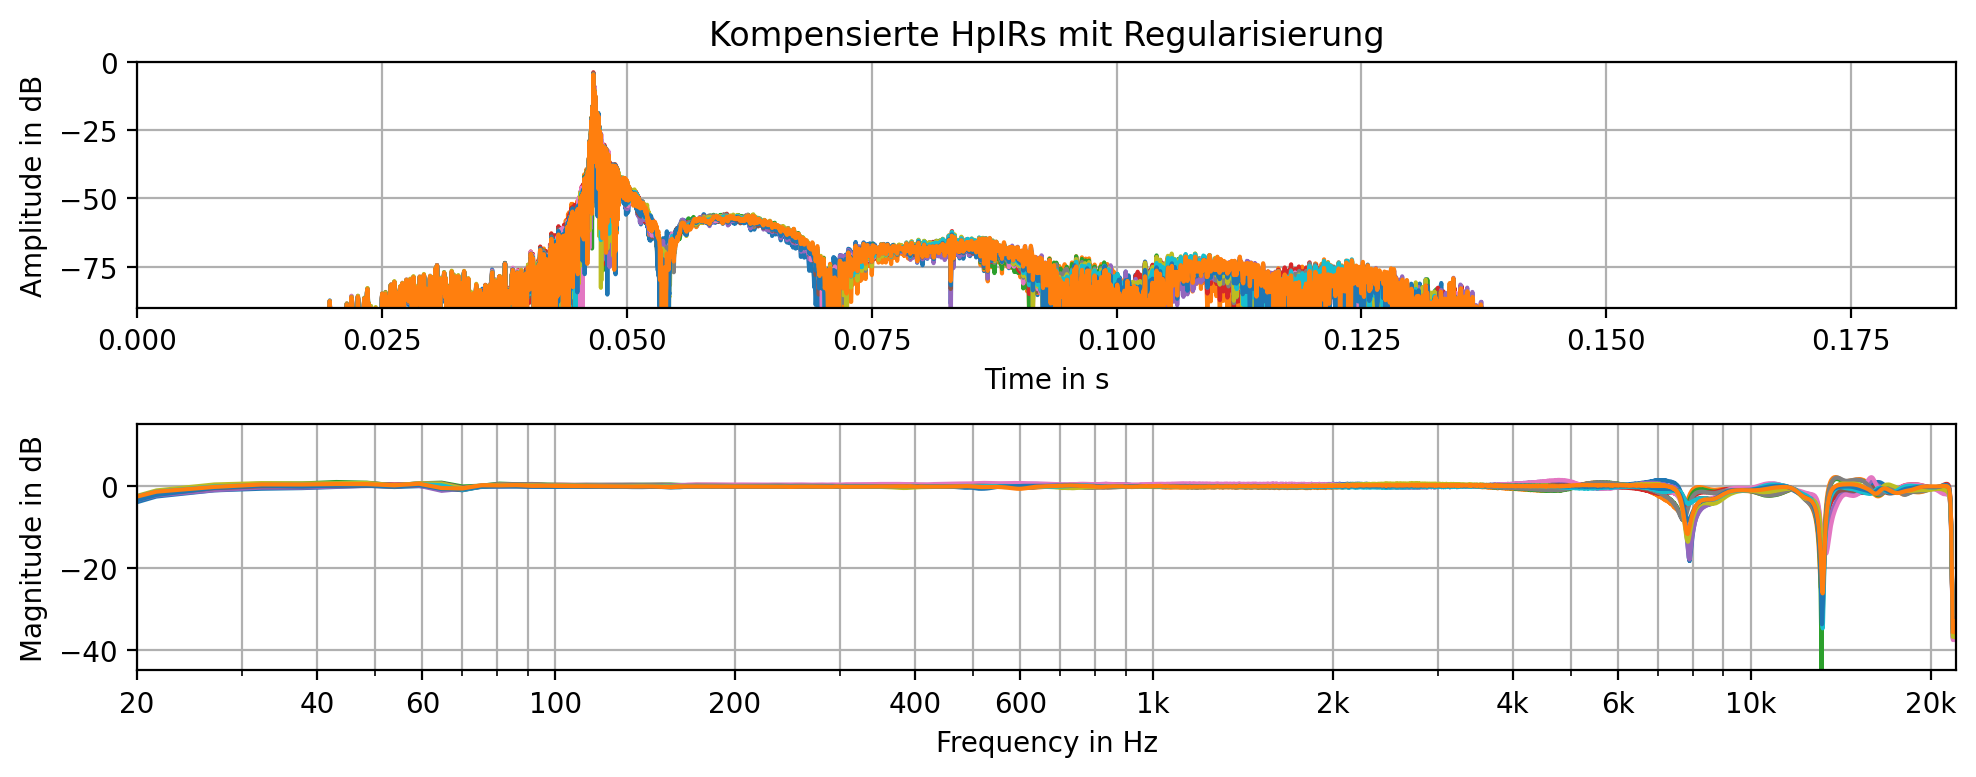

In [16]:
# Fügen Sie hier Ihre Lösung ein:

fig1, ax1 = plt.subplots(2,1, figsize=(10,4))
pf.plot.time_freq(hpir_compensated_direct, dB_time = True, dB_freq = True, ax=ax1)
ax1[0].set_title("Kompensierte HpIRs ohne Regularisierung")
ax1[0].grid()
ax1[0].set_ylim(-90,0)
ax1[1].set_ylim(-45,15)
plt.tight_layout()

fig2, ax2 = plt.subplots(2,1, figsize = (10,4))
pf.plot.time_freq(hpir_compensated_regu, dB_time = True, dB_freq = True, ax=ax2)
ax2[0].set_title("Kompensierte HpIRs mit Regularisierung")
ax2[0].grid()
ax2[0].set_ylim(-90,0)
ax2[1].set_ylim(-45,15)
plt.tight_layout()

# Ab hier nicht mehr bearbeiten.
plt.show()

Beschreiben Sie die Unterschiede der beiden kompensierten Filter. Welche Form sollten Impulsantwort und Frequenzgang der kompensierten Filter im Optimalfall annehmen?

*Fügen Sie hier Ihre Lösung ein:*

Im Zeitbereich ist erkennbar, dass die Impulsantworten mit Regularisierung geringere Pegel beim Ein- und Ausschwingen haben, wie es auch schon in 1f) der Fall war.  
Im Frequenzbereich gibt es bei den Impulsantworten mit Regularisierung zwischen 20-30 Hz eine Absenkung, ohne Regularisierung ist es in diesem Bereich eine Anhebung. Genauso gibt es bei den Impulsantworten mit Regularisierung oberhalb von 20 kHz eine Absenkung, die es ohne Regularisierung nicht gibt.  
Insgesamt sind die Impulsantworten mit Regularisierung deutlich einheitlicher als ohne. Im hochfrequenten Bereich können durch Messungenauigkeiten zwischen den Messungen starke Dips und Peaks auftreten, die sich zwischen den verschiedenen Messungen unterscheiden. Ohne Regularisierung werden diese für jede Messung separat radikal kompensiert. Mit Regularisierung gibt es diese starke Kompensation nicht, weswegen alle Frequenzgänge einheitlicher sind. Beispielsweise bei dem Dip/Peak zwischen 10 kHz und 20 kHz werden in den nicht regularisierten Impulsantworten manche der Messungen angehoben, andere an genau dieser Stelle abgesenkt. Bei den regularisierten Impulsantworten werden an dieser Stelle alle abgesenkt.  

Der ideale Frequenzgang der kompensierten Filter, sollte linear 0 dB über den gesamten Frequenzbereich betragen. Die ideale Impulsantwort sollte ähnlich einem Dirac-Impuls, einem Peak mit minimalem Pre- und Postringing, entsprechen. Abweichungen davon sind Kompromisse aus Regularisierung, endlicher Filterlänge oder Messrauschen.

*Ab hier nicht mehr bearbeiten.*

### Aufgabe 1h) (2 Punkte)

Vergleichen Sie die beiden Filtertypen wie folgt:

Erzeugen Sie mit `pf.signals.noise()` ein rosa Rauschen von $0.5\,\mathrm{s}$ Länge. 

Falten Sie `hpir_compensated_direct` und `hpir_compensated_regu` mit dem Rauschsignal. Achten Sie darauf, dass die Signale nicht übersteuern, indem Sie die rms-Energie des Rauschsignals niedrig genug setzen. Speichern Sie die Ergebnisse in den Variablen `filtered_noise_direct` und `filtered_noise_regu`.

Spielen Sie für beide Filtertypen die gefilterten Rauschsignale für alle Messungen hintereinander ab und hören Sie auf die Unterschiede zwischen den einzelnen Messungen.

**Hinweis:** Benutzen Sie die Funktion `sd.play()`. Wenn Sie alle Signale hintereinander mit einer for-Schleife abspielen, können Sie mit `sd.play(..., blocking=True)` sicherstellen, dass die Signale nicht gleichzeitig, sondern nacheinander abgespielt werden.

In [17]:
# Rosa rauschen erzeugen und mit kompensierten Filtern falten
# Fügen Sie hier Ihre Lösung ein:
pink_noise = pf.signals.noise(n_samples = 22500, spectrum="pink", rms=0.2, sampling_rate=44100)
# Ab hier nicht mehr bearbeiten.

# Kompensierte Filter mit Rauschen falten:
# Fügen Sie hier Ihre Lösung ein:
filtered_noise_direct = pf.dsp.convolve(pink_noise, hpir_compensated_direct)
filtered_noise_regu = pf.dsp.convolve(pink_noise, hpir_compensated_regu)
# Ab hier nicht mehr bearbeiten.

# Ausgangsgerät setzen
# hier entweder den Index des gewünschten Ausgabegeräts oder dessen Namen als string angeben: 
sd.default.device = 8
# print(f'sd.query_devices(): \n{sd.query_devices()}\n')

# a = filtered_noise_direct.time.T[:,0:2]
# print(a.shape)

PLAY_AUDIO = False # Bitte vor Hochladen der Abgabe wieder auf False setzen
if PLAY_AUDIO == 1:
    # Kanäle von filtered_noise_direct hintereinander abspielen:
    # Fügen Sie hier Ihre Lösung ein:
    for i in range(12):
        sd.play(filtered_noise_direct.time.T[:,i], 44100, blocking=True)
    # Ab hier nicht mehr bearbeiten.

if PLAY_AUDIO == 2:
    # Kanäle von filtered_noise_regu hintereinander abspielen:
    # Fügen Sie hier Ihre Lösung ein:
    for i in range(12):
        sd.play(filtered_noise_regu.time.T[:,i], 44100, blocking=True)
    # Ab hier nicht mehr bearbeiten.

In [18]:
### BEGIN TESTS
assert isinstance(filtered_noise_direct, pf.Signal), f'Expected pf.Signal, got {type(filtered_noise_direct)}'
assert isinstance(filtered_noise_regu, pf.Signal), f'Expected pf.Signal, got {type(filtered_noise_regu)}'
assert filtered_noise_direct.cshape == (12,), f'Expected (12,), got {filtered_noise_direct.cshape}'
assert filtered_noise_regu.cshape == (12,), f'Expected (12,), got {filtered_noise_regu.cshape}'
assert np.max(np.abs(filtered_noise_direct.time)) < 1, 'Signal is clipping, check your levels.'
assert np.max(np.abs(filtered_noise_regu.time)) < 1, 'Signal is clipping, check your levels.'
### END TESTS

AssertionError: Signal is clipping, check your levels.

Beschreiben Sie kurz die klanglichen Unterschiede. Wie sollte sich das Signal im Optimalfall anhören? Welcher der beiden Filtertypen erzeugt auffälligere Unterschiede? Erklären Sie diese Unterschiede anhand der Frequenzgänge der kompensierten Filter.

*Fügen Sie hier Ihre Lösung ein:*

Alle Rauschsignale haben mehr oder weniger stark unterschiedliche Formanten, klingen also verschieden hell. Die Unterschiede zwischen den verschiedenen Signalen sind dabei größer und dadurch auffälliger beim nicht regularisierten Filtertyp. Wie bereits in 1g) erwähnt, gibt es zwischen den verschiedenen Messungen beim nicht regularisierten Filter größere Unterschiede, die daher hier in den Rauschsignalen auch hörbar sind. Beim regularisierten Filter sind die Frequenzgänge der kompensierten Filter einheitlicher, weswegen die Unterschiede zwischen den verschiedenen Rauschsignalen auch geringer sind.  

Das Signal sollte sich im Optimalfall für alle Messungen gleich anhören, was bedeutet, dass es keine Unterschiede zwischen den Messungen gibt.

*Ab hier nicht mehr bearbeiten.*

# Aufgabe 2: Stereofone Abbildung

Auf der folgenden maßstabsgetreuen Zeichnung sind vier Schallquellen (S1 - S4) dargestellt, die mit einem Paar omnidirektionaler Mikrofone mit Mikrofonabstand $a$ aufgenommen werden. Stellen Sie sich vor, es handelt sich um ein Streichquartett auf einer Bühne.
Durch die unterschiedlichen Distanzen zwischen Schallquelle und den beiden Mikrofonen werden Laufzeitdifferenzen zwischen den Mikrofonkanälen erzeugt.

Rechts ist dargestellt, welcher wahrgenommene Position der Phantomschallquelle im Stereopanorama ($0$: Mitte, $\pm 1$: rechts/links) durch eine Zeitdifferenz $\Delta t$ bzw. Pegeldifferenz $\Delta L$ zwischen linkem und rechtem Kanal erzeugt wird.

**Hinweis:** Geben Sie bei den Rechnungen alle Rechenschritte an. Rechnungen können Sie wahlweise in den Markdown-Feldern mit $\LaTeX$-Formatierung eingeben, oder handschriftlich lösen und als Scan abgeben. Diese Aufgabe kann wahlweise komplett handschriftlich gelöst werden, oder zum Teil mit Hilfe von Python. Wenn Sie die Berechnungen handschriftlich durchführen, lassen Sie die Python-Zellen einfach leer (und umgekehrt).

<div>
<img src=stereofone_abbildung_skizze.PNG width="35%"/> <img src=stereofone_abbildung_lokalisation.PNG width="50%"/>
</div> 

### Aufgabe 1a) (1 Punkt)

Die Distanz einer Schallquelle zu den beiden Mikrofonen seien $s_1$ und $s_2$. Leiten Sie eine Formel für den Laufzeitunterschied $\Delta t$ zwischen den beiden Signalen in Abhängigkeit von $s_1$ und $s_2$ her. 


*Fügen Sie hier Ihre Lösung ein:*

$t_1 = \frac{s_1}{c};  \ \ \ \  t_2 = \frac{s_2}{c}$  

$\Delta t = |t_1 - t_2| = \frac{|s_1 - s_2|}{c}$. 

*Ab hier nicht mehr bearbeiten.*

### Aufgabe 2b) (2 Punkte)

Nehmen Sie an, dass die Mikrofone nicht wie in der Skizze platziert sind, sondern im Mikrofonabstand $a = 17\,\mathrm{cm}$ (typischer Ohrabstand). Nehmen Sie eine Schallgeschwindigkeit von $c=340\,\mathrm{m/s}$ an. 

Lesen Sie die Position von S1 aus der Grafik ab und bestimmen Sie die resultierende Laufzeitdifferenz $\Delta t$.

**Hinweis:** Zur Berechnung von $s_1$ und $s_2$ bietet sich Vektorrechnung an. Sie können die Berechnung wahlweise in Python oder handschriftlich durchführen. Lassen Sie die jeweils ungenutze Zelle einfach leer. Hilfreiche Funktionen zur Vektorrechnung in python sind z.B. `vector = np.array([x, y])` und `np.linalg.norm()`.

*Für Lösungen in Text/$\mathrm{\LaTeX}$-Form:*

*Fügen Sie hier Ihre Lösung ein:*

<div>
<img src="Aufg 2b).jpeg" width="50%"/>
</div> 

*Ab hier nicht mehr bearbeiten.*

In [19]:
# Für Lösungen mit Python:
# Fügen Sie hier Ihre Lösung ein:
# Ab hier nicht mehr bearbeiten.

Lesen Sie aus der Abbildung ab, an welcher Stelle im Stereopanorama die Phantomquelle (ungefähr) erscheinen wird.

*Fügen Sie hier Ihre Lösung ein:*

Ein $\Delta t$ von $0,4 \mathrm{\,ms}$ entspricht in etwa einer Stelle von 60%.

*Ab hier nicht mehr bearbeiten.*

### Aufgabe 2c) (2 Punkte)

Bestimmen Sie nochmal die Laufzeitdifferenz $\Delta t$, nun mit Hilfe der Fernfeldnäherung
$$ \Delta t \approx \frac{a}{c} \sin(\varphi) . $$

Legen Sie den Winkel $\varphi$ am Koordinatenursprung an (in der Fernfeldnäherung wird davon ausgegangen, dass der Winkel gleich ist, egal ob er am Mittelpunkt oder an einem der Mikrofone angelegt wird).

Bestimmen Sie den durch die Fernfeldnäherung auftretenden Fehler in Prozent.

*Für Lösungen in Text/$\mathrm{\LaTeX}$-Form:*

*Fügen Sie hier Ihre Lösung ein:*

<div>
<img src="Aufg 2c).jpeg" width="50%"/>
</div> 

*Ab hier nicht mehr bearbeiten.*

In [20]:
# Für Lösungen mit Python:
# Fügen Sie hier Ihre Lösung ein:
# Ab hier nicht mehr bearbeiten.

### Aufgabe 2d) (2 Punkte)

Wenn S1 auf dem Stereopanorama ganz links erscheinen soll, wie groß ist der erforderliche Mikrofonabstand $a$ in cm (gerundet auf 5 cm)?

*Hinweis:* Sie können entweder die Fernfeldnäherung benutzen oder $\Delta t$ analog zu Aufgabe 2a) für mehrere Werte von $a$ berechnen und den Mikrofonabstand ermitteln, der die gewünschte Laufzeitdifferenz erzeugt. 

*Für Lösungen in Text/$\mathrm{\LaTeX}$-Form:*

*Fügen Sie hier Ihre Lösung ein:*

<div>
<img src="Aufg 2d).jpeg" width="50%"/>
</div> 

*Ab hier nicht mehr bearbeiten.*

In [21]:
# Für Lösungen mit Python:

# Fügen Sie hier Ihre Lösung ein:
# Ab hier nicht mehr bearbeiten.

### Aufgabe 1e) (1 Punkt)

Die Basis des Stereomikrofons betrage nun wieder $a = 17 \,\mathrm{cm}$. S1 wird mit einem zusätzlichen Stützmikrofon in unmittelbarer Nähe des Instruments aufgenommen. Das Signal des Stützmikrofons wird durch Amplitudenpanning zum Stereosignal gemischt. Wie groß ist die erforderliche Pegeldifferenz in dB, damit die Phantomschallquelle des Stützmikrofonsignals im Lautsprecherpanorama an der gleichen Stelle erscheint wie die Phantomschallquelle des Stereomikrofons (gerundet auf 1 dB)?

*Fügen Sie hier Ihre Lösung ein:*

Durch Ablesen aus den Diagrammen ist die erforderliche Pegeldifferenz etwa 7 dB. Das entspricht genau wie die 0,4 ms Laufzeitunterschied einer Panorama-Verschiebung von etwa 60%.

*Ab hier nicht mehr bearbeiten.*